Дан список из $N$ элементов ($0$ и $1$), необходимо максимизировать сумму элементов.

In [1]:
import logging
from numpy.random import randint, rand
import matplotlib.pyplot as plt

Фитнесс-функция - сумма элементов массива:

In [2]:
def fitness(bits):
  if isinstance(bits, int):
    return bits
  if isinstance(bits, list):
    return sum(bits)
  
  raise TypeError

Выбор популяций с наибольшим значением фитнесс-функции

In [3]:
def select(populations, scores, selection_number):
  selected_idx = 0

  for _ in range(selection_number):
    cur_idx = randint(len(populations))
    if scores[cur_idx] > scores[selected_idx]:
      selected_idx = cur_idx
    
  return populations[selected_idx]

Одноточечное скрещивание популяций:

In [4]:
def cross_over(parent1, parent2, cross_rate):
  length = len(parent1)
  child1, child2 = parent1.copy(), parent2.copy()
  if rand() < cross_rate:
    mid = randint(1, length-1)
    child1 = parent1[:mid] + parent2[mid:]
    child2 = parent2[:mid] + parent1[mid:]

  return child1, child2

Мутация - инвертирование случайного элемента списка:

In [5]:
def mutate(child, mutation_rate):
  length = len(child)
  if rand() < mutation_rate:
    idx = randint(length)
    idx = randint(length)
    child[idx] = 1 - child[idx]
  
  return child

Генетический алгоритм

In [10]:
def genetic_algorithm(
  length,
  iterations,
  population_size,
  cross_rate,
  mutation_rate,
  selection_number
):
  x, y = [], []
  populations = [[0] * length for _ in range(population_size)]
  ans, ans_score = populations[0], fitness(populations[0])

  for generation_idx in range(iterations):
    if ans_score == length:
      break

    scores = [fitness(candidate) for candidate in populations]
    max_score = max(scores)
    mean_score = sum(scores) / len(scores)
    print(f'Generation {generation_idx}: {max_score=} {mean_score=}')

    for idx, score in enumerate(scores):
      if score > ans_score:
        ans, ans_score = populations[idx], score

    x.append(generation_idx)
    y.append(ans_score)

    children = []

    for pair_idx in range(population_size // 2):
      parent1 = select(populations, scores, selection_number)
      parent2 = select(populations, scores, selection_number)
      child1, child2 = cross_over(parent1, parent2, cross_rate)
      children += [
          mutate(child1, mutation_rate),
          mutate(child2, mutation_rate)
      ]
    populations = children
  plt.plot(x, y)
  plt.show()


Generation 0: max_score=0 mean_score=0.0
Generation 1: max_score=1 mean_score=0.11
Generation 2: max_score=3 mean_score=1.07
Generation 3: max_score=5 mean_score=2.41
Generation 4: max_score=7 mean_score=4.51
Generation 5: max_score=8 mean_score=6.46
Generation 6: max_score=9 mean_score=8.12
Generation 7: max_score=11 mean_score=9.1
Generation 8: max_score=13 mean_score=10.76
Generation 9: max_score=15 mean_score=13.1
Generation 10: max_score=16 mean_score=14.45
Generation 11: max_score=18 mean_score=16.0
Generation 12: max_score=20 mean_score=17.78
Generation 13: max_score=22 mean_score=19.55
Generation 14: max_score=24 mean_score=21.45
Generation 15: max_score=26 mean_score=23.74
Generation 16: max_score=28 mean_score=25.79
Generation 17: max_score=29 mean_score=27.5
Generation 18: max_score=30 mean_score=29.09
Generation 19: max_score=32 mean_score=30.06
Generation 20: max_score=34 mean_score=31.8
Generation 21: max_score=35 mean_score=33.48
Generation 22: max_score=39 mean_score=35

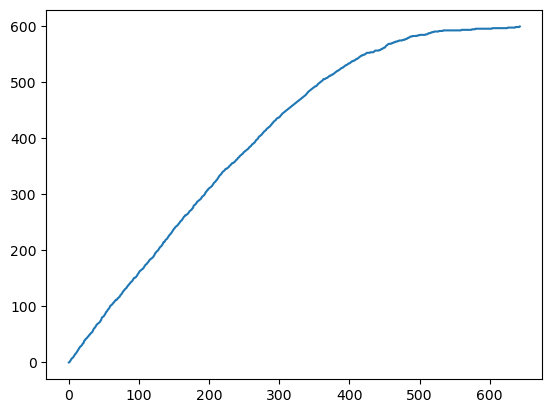

In [11]:
genetic_algorithm(600, 10000, 100, 0.9, 0.1, 50)

За 600 шагов генетический алгоритм научился формировать список из всех единиц.

Длина списка - $600$, популяций - $100$, вероятность скрещивания - $0.9$, вероятность мутации - $0.1$